<a href="https://colab.research.google.com/github/manideep137/EAI-6000/blob/master/Week_3_Lab_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this lab we will train a neural network model to classify images of clothing. 

The lab is designed to be run using Google Colab, but also can be run as a normal jupyter notebook with minor modifications.

This lab uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

Code for mispredections and confusion matrix is taken from Chandra Sai Ram's Assignment,used it in my assignment after understandig it.

In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass


TensorFlow 2.x selected.


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


## Import the Fashion MNIST dataset

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Examine the dataset size.
1. What are the sizes of each image? 
2. How many categories are there?
3. How many images are there in the test and training sets?
4. What are the range of values for the images? 


1. Size of eazch image is 28 by 28
2. 10 catogeries
3. 60,000 images in training set and 10,000 images in test set
4. range of vaues for image is 0-255 

Code can be found below
   

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(class_names)

10

In [6]:
len(train_images)

60000

In [7]:
len(test_images)

10000

In [8]:
train_images[1,1]

array([  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
       255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
         0,   0], dtype=uint8)

Preprocess the data by scaling the pixel values of all images to fall between 0 and 1.

In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format  display the first 10 images from the *training set* and display the class name below each image.


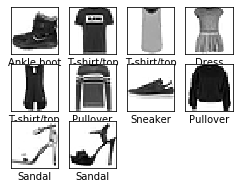

In [10]:
plt.figure(figsize=(4,4))
for i in range(10):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Build the model

Using Keras, build a neural network with a single hidden layer consisting of 64 neurons. Remember that you will either have to reshape the image data into 1D vectors, or use a flatten layer at the input.
1. Set up the model layers
2. Compile the model 
3. Print the model summary

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [13]:
model.get_config()

{'layers': [{'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 64,
    'use_bias': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'linear',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'Glorot

## Train the model

Train the model on the training images for 20 epochs.




In [14]:
model.fit(train_images, train_labels, epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 73us/sample - loss: 0.5170 - accuracy: 0.8216
Epoch 2/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3954 - accuracy: 0.8589
Epoch 3/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3590 - accuracy: 0.8721
Epoch 4/20
60000/60000 [==============================] - 4s 68us/sample - loss: 0.3318 - accuracy: 0.8799
Epoch 5/20
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3141 - accuracy: 0.8849
Epoch 6/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3005 - accuracy: 0.8892
Epoch 7/20
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2861 - accuracy: 0.8952
Epoch 8/20
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2779 - accuracy: 0.8968
Epoch 9/20
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2678 - accuracy: 0.9016
Epoch 10/20
60

Evaluate the accuracy of the model on the test dataset. How does it compare with the training accuracy? Is it likely overfitting or underfitting?

In [15]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3561 - accuracy: 0.8779

Test accuracy: 0.8779


The training accuracy is greater than test accuracy,the model is overfitting.



### Make predictions

The outputs layer of the model contains predictions about the classification for each image. 

In [0]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
class_predictions = model.predict_classes(test_images)
prediction_probabilities = probability_model.predict(test_images)

In [17]:
prediction_probabilities.shape

(10000, 10)

In [18]:
class_predictions.shape

(10000,)

Examine the shape of the variable 'prediction_probabilities'. How is it different from class_predictions? What do the dimensions correspond to?

Shape of variable 'prediction_probabilities' is (10000,10) and shape of 'class_predections' is (10000,)
For 'prediction_probabilities' 10000 denotes number of test images and 10 probabilities denoting the likeliness of an image belonging to a particular class

The following functions plot the image and a bar graph of the predicted probabilities. Using these functions, make a plot of the first 25 test images that were incorrectly classified along with their predicted probabilities. Interpret these images - what sort of images tend to be misclassified?

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(np.arange(10),list(class_names),rotation=90)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)


  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')



In [0]:
def plot_misimage(predictions_array, true_label, img):
  count = 0
  plt.figure(figsize=(20, 10))
  for i in range(10000):
      #img = img[i]
      predicted_label = np.argmax(predictions_array[i])
      if predicted_label == true_label[i]:
        color = 'blue'
      else:
        color = 'red'
      if color == 'red':
          plt.subplot(5,10,2*count+1)
          plt.grid(False)
          plt.xticks([])
          plt.yticks([])
          plt.imshow(img[i], cmap=plt.cm.binary)
          plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                    100*np.max(predictions_array[i]),
                                    class_names[true_label[i]]),
                                    color=color)
          plt.subplot(5,10,2*count+2)
          plt.grid(False)
          #range(10)
          #plt.xticks(np.arange(10),list(class_names),rotation=90)
          plt.xticks(range(10))
          plt.yticks([])
          thisplot = plt.bar(range(10), predictions_array[i], color="#777777")
          plt.ylim([0, 1])
          predicted_label = np.argmax(predictions_array[i])


          thisplot[predicted_label].set_color('red')
          thisplot[true_label[i]].set_color('blue')
          count = count+1
      if count == 25:
         break

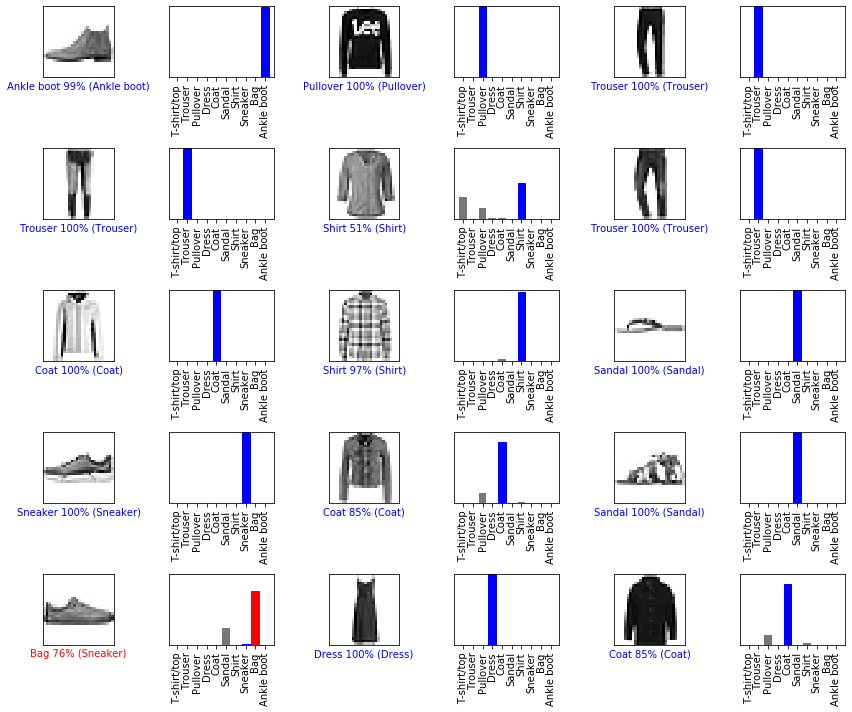

In [21]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction_probabilities[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction_probabilities[i], test_labels)
plt.tight_layout()
plt.show()

Plot a confusion matrix of the predictions. Which misclassifications are the most common?

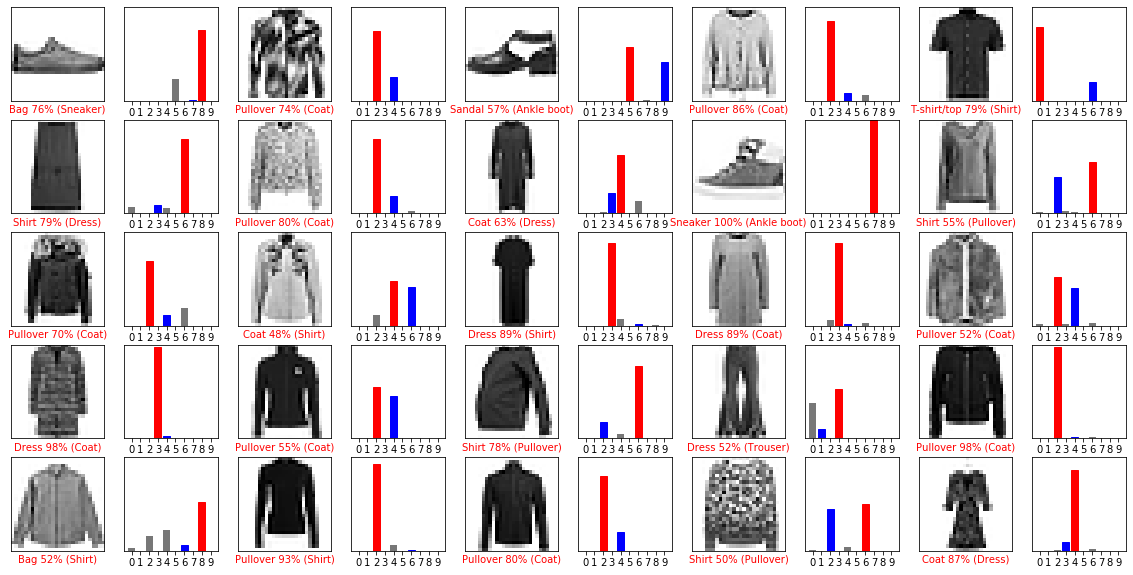

In [22]:
plot_misimage(prediction_probabilities, test_labels, test_images)
plt.show()

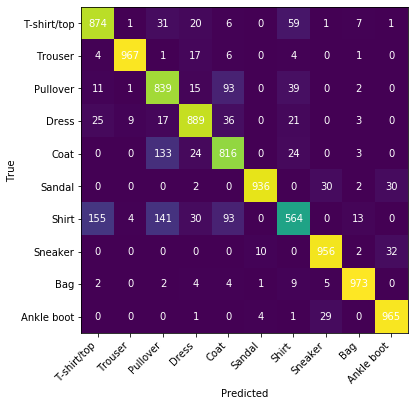

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels,class_predictions)
fig, ax = plt.subplots(figsize= (12,6))
im = ax.imshow(cm)
ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
ax.set_xticklabels(list(class_names), rotation=45, ha="right")
ax.set_yticklabels(list(class_names))
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
for i in range(100):
    ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")
